The parameters:  [Parameter containing:
tensor([[ 0.6209, -0.1178]], requires_grad=True), Parameter containing:
tensor([0.3026], requires_grad=True)]
Before Training: 


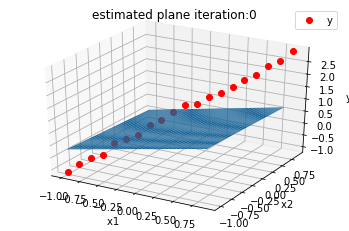

After Training: 


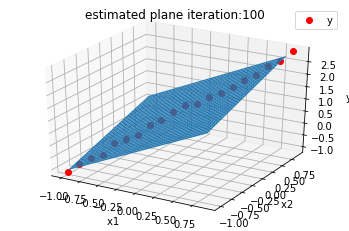

Text(0, 0.5, 'Cost/total loss ')

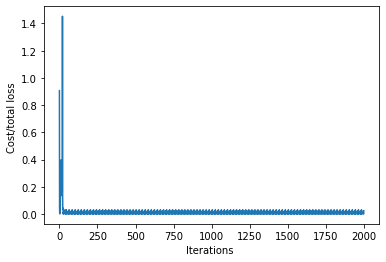

In [15]:
import torch
from torch import nn,optim
from torch.utils.data import DataLoader, Dataset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

torch.manual_seed(1)
# The function for plotting 2D

def Plot_2D_Plane(model, dataset, n=0):
    w1 = model.state_dict()['linear.weight'].numpy()[0][0]
    w2 = model.state_dict()['linear.weight'].numpy()[0][1]
    b = model.state_dict()['linear.bias'].numpy()

    # Data
    x1 = data_set.x[:, 0].view(-1, 1).numpy()
    x2 = data_set.x[:, 1].view(-1, 1).numpy()
    y = data_set.y.numpy()

    # Make plane
    X, Y = np.meshgrid(np.arange(x1.min(), x1.max(), 0.05), np.arange(x2.min(), x2.max(), 0.05))
    yhat = w1 * X + w2 * Y + b

    # Plotting
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    ax.plot(x1[:, 0], x2[:, 0], y[:, 0],'ro', label='y') # Scatter plot
    
    ax.plot_surface(X, Y, yhat) # Plane plot
    
    ax.set_xlabel('x1 ')
    ax.set_ylabel('x2 ')
    ax.set_zlabel('y')
    plt.title('estimated plane iteration:' + str(n))
    ax.legend()

    plt.show()



class Data2D(Dataset):
  def __init__(self):
    self.x = torch.zeros(20,2)
    self.x[:,0]= torch.arange(-1,1,0.1)
    self.x[:,1]=torch.arange(-1,1,0.1)
    self.w = torch.tensor([[1.0], [1.0]])
    self.b = 1
    self.f = torch.mm(self.x,self.w) + self.b
    self.y = self.f + 0.1 * torch.randn((self.x.shape[0],1))
    self.len = self.x.shape[0]

  def __getitem__(self,index):
    return self.x[index], self.y[index]
  
  def __len__(self):
    return self.len


data_set = Data2D()

class LR(nn.Module):
  def __init__(self,in_size,out_size):
    super(LR,self).__init__()
    self.linear = nn.Linear(in_size,out_size)

  def forward(self,x):
    yhat = self.linear(x)
    return yhat

model = LR(2,1)
print("The parameters: ", list(model.parameters()))

optimiser = optim.SGD(model.parameters(),lr=0.1)
criterion = nn.MSELoss()
train_loader = DataLoader(dataset=data_set, batch_size =1)
print("Before Training: ")
Plot_2D_Plane(model, data_set)   
epochs = 100
LOSS=[]
def Regr_Model(iter):
  for epoch in range(iter):
    for x,y in train_loader:
      yhat = model(x)
      loss = criterion(yhat,y)
      LOSS.append(loss.item())
      optimiser.zero_grad()
      loss.backward()
      optimiser.step()


Regr_Model(100)
print("After Training: ")
Plot_2D_Plane(model, data_set, epochs)  

plt.plot(LOSS)
plt.xlabel("Iterations ")
plt.ylabel("Cost/total loss ")